In [1]:
# Import all libraries needed for the tutorial
import pandas as pd
import numpy as np
import psycopg2
import sys
from pandas.io import sql
from pandas.io.sql import read_sql
import statsmodels.api as sm
import statsmodels.formula.api as smf

#pd.set_option('display.mpl_style', 'default') 
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

print('This Python version ' + sys.version)
print('Pandas version ' + pd.__version__)

This Python version 3.4.3 |Anaconda 2.2.0 (x86_64)| (default, Mar  6 2015, 12:07:41) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Pandas version 0.16.1


In [5]:
con = psycopg2.connect("dbname=testdb user=tim")  
#cur = con.cursor()
print("con is open")

con is open


In [6]:
sql = "SELECT * FROM vam WHERE vam.grade = %s AND vam.year = %s ORDER BY vam.school_id;"

data2013 = pd.read_sql(sql, con, index_col=None, coerce_float=True, params=['All Grades','2013'], parse_dates=None, columns=None, chunksize=None)

race = pd.DataFrame.from_csv('race2013.csv', index_col=None, encoding='utf-8')

if con:
    con.close()

In [7]:
data2013[:4]

,school_name,school_id,network,grade,year,reading_studentsnumber,reading_vam,reading_confidence,reading_percentile,reading_color,math_studentsnumber,math_vam,math_confidence,math_percentile,math_color
0,GLOBAL CITIZENSHIP CHTR,400009,Charter/Contract,All Grades,2013,93,-0.3,-1.3 to 0.7,33,Yellow,93,-0.8,-1.6 to 0,20,Red
1,"LOCKE, A CHTR",400011,Charter/Contract,All Grades,2013,213,0.7,-0.1 to 1.5,81,Yellow,213,1.0,0.5 to 1.5,87,Green
2,AMANDLA CHTR HS,400012,Charter/Contract,All Grades,2013,243,-1.9,-2.7 to -1.1,2,Red,244,-1.4,-2 to -0.9,7,Red
3,ASPIRA CHTR - HAUGAN,400017,Charter/Contract,All Grades,2013,562,0.4,-0.2 to 1,71,Yellow,561,0.5,0.2 to 0.9,73,Green


In [8]:
data2013.to_csv("data2013.csv")

In [9]:
data = pd.DataFrame.from_csv('data2013.csv', index_col=None, encoding='utf-8')
data[:4]

,Unnamed: 0,school_name,school_id,network,grade,year,reading_studentsnumber,reading_vam,reading_confidence,reading_percentile,reading_color,math_studentsnumber,math_vam,math_confidence,math_percentile,math_color
0,0,GLOBAL CITIZENSHIP CHTR,400009,Charter/Contract,All Grades,2013,93,-0.3,-1.3 to 0.7,33,Yellow,93,-0.8,-1.6 to 0,20,Red
1,1,"LOCKE, A CHTR",400011,Charter/Contract,All Grades,2013,213,0.7,-0.1 to 1.5,81,Yellow,213,1.0,0.5 to 1.5,87,Green
2,2,AMANDLA CHTR HS,400012,Charter/Contract,All Grades,2013,243,-1.9,-2.7 to -1.1,2,Red,244,-1.4,-2 to -0.9,7,Red
3,3,ASPIRA CHTR - HAUGAN,400017,Charter/Contract,All Grades,2013,562,0.4,-0.2 to 1,71,Yellow,561,0.5,0.2 to 0.9,73,Green


In [10]:
data.dtypes

Unnamed: 0                  int64
school_name                object
school_id                   int64
network                    object
grade                      object
year                        int64
reading_studentsnumber    float64
reading_vam               float64
reading_confidence         object
reading_percentile        float64
reading_color              object
math_studentsnumber       float64
math_vam                  float64
math_confidence            object
math_percentile           float64
math_color                 object
dtype: object

In [11]:
race[:4]

,school_id,School,Total,White,Whiteperc,Black,Blackperc,PacIsl,PasIslperc,NatAm,NatAmperc,Hispanic,Hispanicperc,multi,Multiperc,Aisian,Asianperc,Haw,Hawperc,NA,Naperc,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,610156,Armstrong L.,98,0,0.0,95,96.9,0,0,0,0.0,3,3.1,0,0.0,0,0,0,0.0,0,0.0,NaN,NaN,NaN
1,609830,Brunson,622,2,0.3,578,92.9,0,0,0,0.0,27,4.3,2,0.3,0,0,0,0.0,13,2.1,NaN,NaN,NaN
2,609851,Chalmers,364,0,0.0,361,99.2,0,0,0,0.0,3,0.8,0,0.0,0,0,0,0.0,0,0.0,NaN,NaN,NaN
3,609795,Clark G. R.,278,5,1.8,174,62.6,0,0,3,1.1,94,33.8,1,0.4,0,0,1,0.4,0,0.0,NaN,NaN,NaN


In [12]:
race.dtypes

school_id         int64
School           object
Total            object
White            object
Whiteperc       float64
Black            object
Blackperc       float64
PacIsl            int64
PasIslperc      float64
NatAm             int64
NatAmperc       float64
Hispanic         object
Hispanicperc    float64
multi             int64
Multiperc       float64
Aisian            int64
Asianperc       float64
Haw               int64
Hawperc         float64
NA                int64
Naperc          float64
Unnamed: 21     float64
Unnamed: 22     float64
Unnamed: 23     float64
dtype: object

In [14]:
left = data
right = race
result = pd.merge(left, right, on='school_id')
result.shape

(488, 39)

In [15]:
result[:4]

,Unnamed: 0,school_name,school_id,network,grade,year,reading_studentsnumber,reading_vam,reading_confidence,reading_percentile,reading_color,math_studentsnumber,math_vam,math_confidence,math_percentile,math_color,School,Total,White,Whiteperc,Black,Blackperc,PacIsl,PasIslperc,NatAm,NatAmperc,Hispanic,Hispanicperc,multi,Multiperc,Aisian,Asianperc,Haw,Hawperc,NA,Naperc,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,0,GLOBAL CITIZENSHIP CHTR,400009,Charter/Contract,All Grades,2013,93,-0.3,-1.3 to 0.7,33,Yellow,93,-0.8,-1.6 to 0,20,Red,Globel Citizenship,296,31,10.5,19,6.4,0,0.0,1,0.3,239,80.7,3,1.0,0,0.0,0,0,3,1.0,NaN,NaN,NaN
1,1,"LOCKE, A CHTR",400011,Charter/Contract,All Grades,2013,213,0.7,-0.1 to 1.5,81,Yellow,213,1.0,0.5 to 1.5,87,Green,Locke A. Charter,588,3,0.5,576,98.0,0,0.0,0,0.0,6,1.0,3,0.5,0,0.0,0,0,0,0.0,NaN,NaN,NaN
2,2,AMANDLA CHTR HS,400012,Charter/Contract,All Grades,2013,243,-1.9,-2.7 to -1.1,2,Red,244,-1.4,-2 to -0.9,7,Red,Amandla Elementay Chrtr,311,1,0.3,304,97.7,0,0.0,0,0.0,2,0.6,0,0.0,0,0.0,0,0,4,1.3,NaN,NaN,NaN
3,3,ASPIRA CHTR - HAUGAN,400017,Charter/Contract,All Grades,2013,562,0.4,-0.2 to 1,71,Yellow,561,0.5,0.2 to 0.9,73,Green,ASPIRA Chrt - Haugan,578,9,1.6,24,4.2,1,0.2,4,0.7,518,89.6,7,1.2,14,2.4,0,0,1,0.2,NaN,NaN,NaN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     5.865
Date:                Mon, 17 Aug 2015   Prob (F-statistic):             0.0158
Time:                        14:46:50   Log-Likelihood:                -2059.9
No. Observations:                 488   AIC:                             4124.
Df Residuals:                     486   BIC:                             4132.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      8.6862      0.748     11.606      0.000         7.216    10.157
x              1.8752      0.774      2.422      0.016         0.354     3.397
==============================================================================
Omnibus:                      222.875   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              765.867
Skew:                           2.210   Prob(JB):                    4.94e-167
Kurtosis:                       7.258   Cond. No.                         1.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

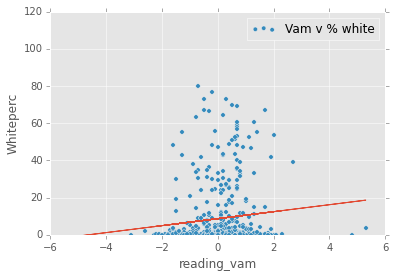

In [16]:
# different way, assign x and y
x = result['reading_vam']
y = result['Whiteperc']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=result).fit()

result.plot(kind='scatter', x='reading_vam', y='Whiteperc',label="Vam v % white")
plt.ylim(0, 120)
plt.xlim(-6, 6)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9700
Date:                Mon, 17 Aug 2015   Prob (F-statistic):              0.325
Time:                        14:46:57   Log-Likelihood:                -2526.4
No. Observations:                 488   AIC:                             5057.
Df Residuals:                     486   BIC:                             5065.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     49.3433      1.947     25.347      0.000        45.518    53.168
x             -1.9835      2.014     -0.985      0.325        -5.941     1.974
==============================================================================
Omnibus:                        0.252   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.881   Jarque-Bera (JB):               69.307
Skew:                           0.055   Prob(JB):                     8.91e-16
Kurtosis:                       1.157   Cond. No.                         1.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

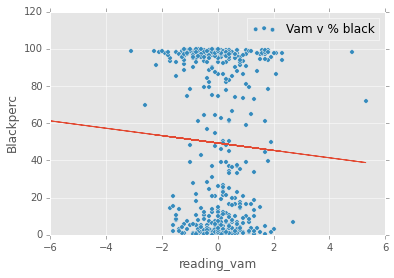

In [17]:
# different way, assign x and y
x = result['reading_vam']
y = result['Blackperc']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=result).fit()

result.plot(kind='scatter', x='reading_vam', y='Blackperc',label="Vam v % black")
plt.ylim(0, 120)
plt.xlim(-6, 6)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4987
Date:                Mon, 17 Aug 2015   Prob (F-statistic):              0.480
Time:                        14:47:05   Log-Likelihood:                -2463.2
No. Observations:                 488   AIC:                             4930.
Df Residuals:                     486   BIC:                             4939.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     36.7132      1.710     21.465      0.000        33.353    40.074
x             -1.2496      1.769     -0.706      0.480        -4.726     2.227
==============================================================================
Omnibus:                       18.863   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.334
Skew:                           0.500   Prob(JB):                     4.80e-14
Kurtosis:                       1.581   Cond. No.                         1.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

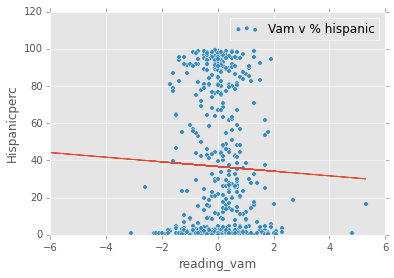

In [18]:
# different way, assign x and y
x = result['reading_vam']
y = result['Hispanicperc']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=result).fit()

result.plot(kind='scatter', x='reading_vam', y='Hispanicperc',label="Vam v % hispanic")
plt.ylim(0, 120)
plt.xlim(-6, 6)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()